In [1]:
from random import randrange, randint
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer
import timeit

In [2]:
def max_func(arr):
    max_value=arr[0]
    for el in arr:
        if el>max_value:
            max_value=el
    return max_value

In [3]:
def min_func(arr):
    min_value=arr[0]
    for el in arr:
        if el>min_value:
            min_value=el
    return min_value

In [4]:
def partition(arr, pivot, pind):
    left=[]
    right=[]
    for i, item in enumerate(arr):
        if item>pivot:
            right += [item]
        elif i!=pind:
            left += [item]
    return left, [pivot], right

In [5]:

def midpoint(arr, mid):
    int(mid)
    if len(arr) != 0:
        index_val = len(arr) - 1
        pivot = arr[index_val]
        (left_part, middle_part, right_part) = partition(arr, pivot, index_val)
        if len(left_part) == mid:
            return left_part
        if len(left_part) + 1 == mid:
            return left_part + middle_part
        if len(left_part) > mid:
            return midpoint(left_part, mid)
        return left_part + middle_part + midpoint(right_part, int(mid - len(left_part) - len(middle_part)))
    return None


In [6]:
def random_midpoint(arr, middle_point):
    int(middle_point)
    if len(arr) != 0:
        index_val = randrange(0, len(arr), 1)
        pivot = arr[index_val]
        (left_part, middle_part, right_part) = partition(arr, pivot, index_val)
        if len(left_part) == middle_point:
            return left_part
        if len(left_part)+1 == middle_point:
            return left_part + middle_part
        if len(left_part) > middle_point:
            return midpoint(left_part, middle_point)
        return left_part+middle_part+midpoint(right_part, int(middle_point-len(left_part)-1))
    return None

In [7]:
def median(arr):
    arr_length = len(arr)
    left = midpoint(arr, int(arr_length / 2 + 1))
    if len(arr) % 2 == 0:
        first_max = max(left)
        el = left.index(max(left))
        left.pop(el)
        second_max = max(left)
        return (first_max + second_max) / 2
    return max(left)

In [8]:
def random_median(arr):
    arr_length = len(arr)
    left = random_midpoint(arr, int(arr_length / 2 + 1))
    if len(arr) % 2 == 0:
        first_max = max(left)
        el = left.index(max(left))
        left.pop(el)
        second_max = max(left)
        return (first_max + second_max) / 2
    return max(left)

In [9]:
def k_el_find_deafult(arr, k):
    start_point=0
    end_point=len(arr)-1
    while True:
        item=end_point
        stored_val=arr[item]
        arr[item]=arr[end_point]
        arr[end_point]=stored_val
        pivot=arr[end_point]
        ind=start_point
        for i in range(start_point, end_point):
            if arr[i]<pivot:
                stored_val=arr[ind]
                arr[ind]=arr[i]
                arr[i]=stored_val
                ind += 1
        arr[end_point]=arr[ind]
        arr[ind]=pivot
        if ind==k-1:
            return pivot
        if ind>k-1:
            end_point=ind-1
        else:
            start_point=ind

In [10]:
def k_el_find_rand(arr, k):
    start_point=0
    end_point=len(arr)-1
    while True:
        item=randrange(0, end_point-1-start_point, 1)-start_point
        stored_val=arr[item]
        arr[item]=arr[end_point]
        arr[end_point]=stored_val
        pivot=arr[end_point]
        ind=start_point
        for i in range(start_point, end_point):
            if arr[i]<pivot:
                stored_val=arr[ind]
                arr[ind]=arr[i]
                arr[i]=stored_val
                ind += 1
        arr[end_point]=arr[ind]
        arr[ind]=pivot
        if ind==k-1:
            return pivot
        elif ind>k-1:
            end_point=ind-1
        else:
            start_point=ind

In [11]:
list_lenghts=[10,500,1000,2000,3000, 4000]
not_sorted_lists=[]
inverse_sorted_lists=[]
sorted_lists=[]
for i in range(6):
    not_sorted_lists.append([randint(0, 1000) for _ in range(list_lenghts[i])])
    inverse_sorted_lists.append(sorted(not_sorted_lists[i], reverse=True))
    sorted_lists.append(sorted(not_sorted_lists[i]))
print(not_sorted_lists[0])
print(sorted_lists[0])
print(inverse_sorted_lists[0])


[829, 47, 195, 203, 597, 721, 109, 605, 413, 662]
[47, 109, 195, 203, 413, 597, 605, 662, 721, 829]
[829, 721, 662, 605, 597, 413, 203, 195, 109, 47]


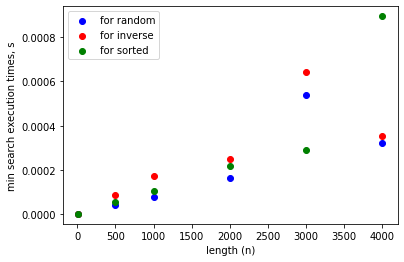

In [12]:
plt.xlabel('length (n)')
plt.ylabel('min search execution times, s')
min_times_r = []
min_times_inv = []
min_times_sort = []
for el in not_sorted_lists:
    time_all = timeit.timeit(lambda: min_func(el), number=10, timer=default_timer)
    min_times_r.append(time_all/10)
for el in sorted_lists:
    time_all = timeit.timeit(lambda: min_func(el), number=10, timer=default_timer)
    min_times_sort.append(time_all/10)
for el in inverse_sorted_lists:
    time_all = timeit.timeit(lambda: min_func(el), number=10, timer=default_timer)
    min_times_inv.append(time_all/10)
    
plt.scatter(list_lenghts, min_times_r, color = "blue", label = "for random")
plt.scatter(list_lenghts, min_times_inv, color = "red", label = "for inverse")
plt.scatter(list_lenghts, min_times_sort, color = "green", label = "for sorted")

leg=plt.legend()


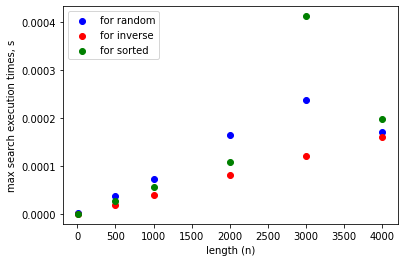

In [13]:
plt.xlabel('length (n)')
plt.ylabel('max search execution times, s')
max_times_r = []
max_times_inv = []
max_times_sort = []
for el in not_sorted_lists:
    time_all = timeit.timeit(lambda: max_func(el), number=10, timer=default_timer)
    max_times_r.append(time_all/10)
for el in sorted_lists:
    time_all = timeit.timeit(lambda: max_func(el), number=10, timer=default_timer)
    max_times_sort.append(time_all/10)
for el in inverse_sorted_lists:
    time_all = timeit.timeit(lambda: max_func(el), number=10, timer=default_timer)
    max_times_inv.append(time_all/10)
    
plt.scatter(list_lenghts, max_times_r, color = "blue", label = "for random")
plt.scatter(list_lenghts, max_times_inv, color = "red", label = "for inverse")
plt.scatter(list_lenghts, max_times_sort, color = "green", label = "for sorted")

leg=plt.legend()


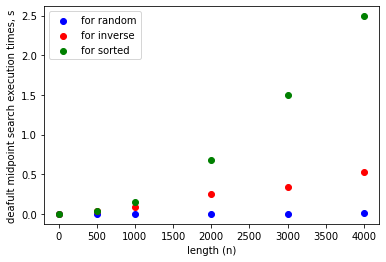

In [14]:
plt.xlabel('length (n)')
plt.ylabel('deafult midpoint search execution times, s')
m_times_r = []
m_times_inv = []
m_times_sort = []
for el in not_sorted_lists:
    time_all = timeit.timeit(lambda: median(el), number=10, timer=default_timer)
    m_times_r.append(time_all/10)
for el in sorted_lists:
    time_all = timeit.timeit(lambda: median(el), number=10, timer=default_timer)
    m_times_sort.append(time_all/10)
for el in inverse_sorted_lists:
    time_all = timeit.timeit(lambda: median(el), number=10, timer=default_timer)
    m_times_inv.append(time_all/10)
    
plt.scatter(list_lenghts, m_times_r, color = "blue", label = "for random")
plt.scatter(list_lenghts, m_times_inv, color = "red", label = "for inverse")
plt.scatter(list_lenghts, m_times_sort, color = "green", label = "for sorted")

leg=plt.legend()


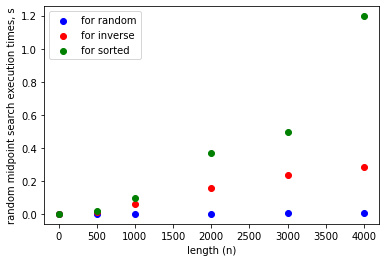

In [15]:
plt.xlabel('length (n)')
plt.ylabel('random midpoint search execution times, s')
m_times_r = []
m_times_inv = []
m_times_sort = []
for el in not_sorted_lists:
    time_all = timeit.timeit(lambda: random_median(el), number=10, timer=default_timer)
    m_times_r.append(time_all/10)
for el in sorted_lists:
    time_all = timeit.timeit(lambda: random_median(el), number=10, timer=default_timer)
    m_times_sort.append(time_all/10)
for el in inverse_sorted_lists:
    time_all = timeit.timeit(lambda: random_median(el), number=10, timer=default_timer)
    m_times_inv.append(time_all/10)
    
plt.scatter(list_lenghts, m_times_r, color = "blue", label = "for random")
plt.scatter(list_lenghts, m_times_inv, color = "red", label = "for inverse")
plt.scatter(list_lenghts, m_times_sort, color = "green", label = "for sorted")

leg=plt.legend()


In [16]:
plt.xlabel('length (n)')
plt.ylabel('deafult kth search execution times, s')
m_times_r = []
m_times_inv = []
m_times_sort = []
for el in not_sorted_lists:
    time_all = timeit.timeit(lambda: k_el_find_deafult(el, randint(1, len(el)-1)), number=5, timer=default_timer)
    m_times_r.append(time_all/5)
for el in sorted_lists:
    time_all = timeit.timeit(lambda: k_el_find_deafult(el, randint(1, len(el)-1)), number=5, timer=default_timer)
    m_times_sort.append(time_all/5)
for el in inverse_sorted_lists:
    time_all = timeit.timeit(lambda: k_el_find_deafult(el, randint(1, len(el)-1)), number=5, timer=default_timer)
    m_times_inv.append(time_all/5)
    
plt.scatter(list_lenghts, m_times_r, color = "blue", label = "for random")
plt.scatter(list_lenghts, m_times_inv, color = "red", label = "for inverse")
plt.scatter(list_lenghts, m_times_sort, color = "green", label = "for sorted")

leg=plt.legend()

In [ ]:
plt.xlabel('length (n)')
plt.ylabel('randomized kth search execution times, s')
m_times_r = []
m_times_inv = []
m_times_sort = []
for el in not_sorted_lists:
    time_all = timeit.timeit(lambda: k_el_find_rand(el, randint(1, len(el)-1)), number=10, timer=default_timer)
    m_times_r.append(time_all/5)
for el in sorted_lists:
    time_all = timeit.timeit(lambda: k_el_find_rand(el, randint(1, len(el)-1)), number=10, timer=default_timer)
    m_times_sort.append(time_all/5)
for el in inverse_sorted_lists:
    time_all = timeit.timeit(lambda: k_el_find_rand(el, randint(1, len(el)-1)), number=10, timer=default_timer)
    m_times_inv.append(time_all/5)
    
plt.scatter(list_lenghts, m_times_r, color = "blue", label = "for random")
plt.scatter(list_lenghts, m_times_inv, color = "red", label = "for inverse")
plt.scatter(list_lenghts, m_times_sort, color = "green", label = "for sorted")

leg=plt.legend()